In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [4]:
data = pd.read_excel('../../../data/机器学习数据/CCPP/Folds5x2_pp.xlsx')

In [6]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
print(X_train)
print(y_train)

         AT      V       AP     RH
9103  14.10  43.34  1012.91  86.45
6281  12.93  38.73  1006.41  89.24
6201  11.12  44.92  1025.58  93.52
2646  15.18  44.20  1019.60  72.45
3568  27.49  63.78  1015.43  47.45
...     ...    ...      ...    ...
2895  26.92  62.44  1011.09  70.80
7813  20.90  67.71  1007.16  59.02
905   18.59  39.54  1008.56  68.61
5192  22.96  45.01  1012.21  50.81
235   20.50  49.69  1009.60  70.81

[7176 rows x 4 columns]
          PE
9103  465.22
6281  471.30
6201  470.82
2646  462.09
3568  445.66
...      ...
2895  437.99
7813  446.57
905   462.56
5192  450.37
235   452.94

[7176 rows x 1 columns]


In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train))

0.9283052054473487


In [13]:
print(ridge.coef_)
print(ridge.intercept_)
y_pred = ridge.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[-1.96862642 -0.23930532  0.05685793 -0.15860993]]
[460.04983649]
MSE: 20.83720998597905
RMSE: 4.5647792921431645


In [14]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100])
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

7.0

In [15]:
y_pred = ridgecv.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.837320919681733
RMSE: 4.5647914431747845


In [16]:
# X is a 10x10 matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y is a 10 x 1 vector
y = np.ones(10)

In [17]:
n_alphas = 200
# alphas count is 200, 都在10的-10次方和10的-2次方之间
alphas = np.logspace(-10, -2, n_alphas)

In [18]:
clf = linear_model.Ridge(fit_intercept=False)
coefs = []
# 循环200次
for a in alphas:
    #设置本次循环的超参数
    clf.set_params(alpha=a)
    #针对每个alpha做ridge回归
    clf.fit(X, y)
    # 把每一个超参数alpha对应的theta存下来
    coefs.append(clf.coef_)

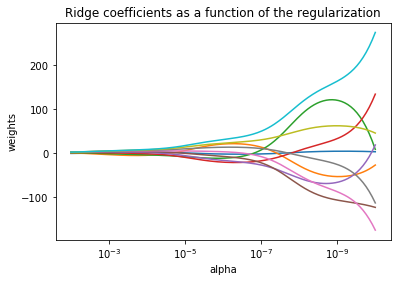

In [19]:
ax = plt.gca()

ax.plot(alphas, coefs)
#将alpha的值取对数便于画图
ax.set_xscale('log')
#翻转x轴的大小方向，让alpha从大到小显示
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()